# Analyse du cas R-S et graphiques 2D

L'objectif de cet exemple est de présenter le cas R-S. Nous présentons également des éléments graphiques pour la visualisation de la surface d'état limite en 2 dimensions.

In [1]:
import openturns as ot
import numpy as np

In [2]:
R = ot.Normal(4., 1.)
R.setDescription("R")

S = ot.Normal(2., 1.)
S.setDescription("S")

In [3]:
g = ot.SymbolicFunction(["R","S"],["R-S"])

In [4]:
inputvector = ot.ComposedDistribution([R,S])
inputRV = ot.RandomVector(inputvector)
outputRV = ot.CompositeRandomVector(g, inputRV)
eventF = ot.Event(outputRV, ot.GreaterOrEqual(), 0) 

In [5]:
# Create the Monte-Carlo algorithm
algoProb = ot.ProbabilitySimulationAlgorithm(eventF)
algoProb.setMaximumOuterSampling(1000)
algoProb.setMaximumCoefficientOfVariation(0.01)
algoProb.run()

In [6]:
# Get the results
resultAlgo = algoProb.getResult()
neval = g.getEvaluationCallsNumber()
print("Number of function calls = %d" %(neval))
pf = resultAlgo.getProbabilityEstimate()
print("Failure Probability = %.4f" % (pf))
level = 0.95
c95 = resultAlgo.getConfidenceLength(level)
pmin=pf-0.5*c95
pmax=pf+0.5*c95
print("%.1f %% confidence interval :[%.4f,%.4f] " % (level*100,pmin,pmax))

Number of function calls = 989
Failure Probability = 0.9100
95.0 % confidence interval :[0.8922,0.9278] 


## Dessiner les isovaleurs de la fonction d'état limite

In [7]:
alphaMin = 0.01
alphaMax = 1 - alphaMin
lowerBound = ot.Point([R.computeQuantile(alphaMin)[0], S.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([R.computeQuantile(alphaMax)[0], S.computeQuantile(alphaMax)[0]])

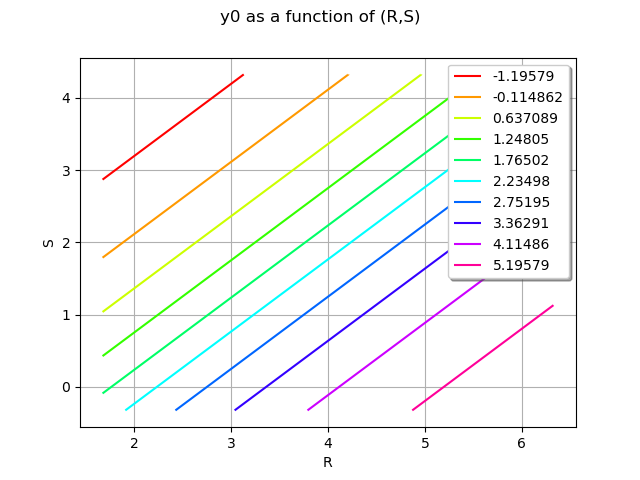

In [8]:
nbPoints = [100, 100]
g.draw(lowerBound, upperBound, nbPoints)

In [9]:
Y = R - S
Y

class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[2] sigma=class=Point name=Unnamed dimension=1 values=[1.41421] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1]

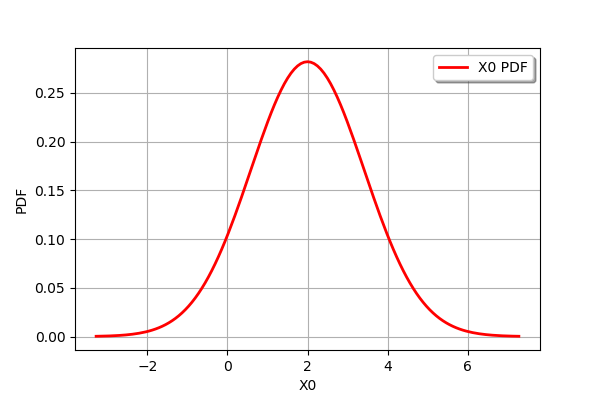

In [10]:
Y.drawPDF()

## Dessiner les iso-valeurs de la densité de probabilité

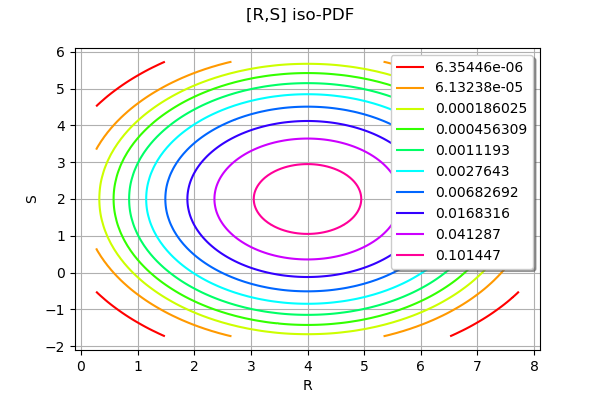

In [11]:
inputvector.drawPDF()

## Visualiser les zones fiables et défaillantes

In [12]:
sampleSize = 500

In [13]:
sampleInput = inputvector.getSample(sampleSize)
sampleInput[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[R,S] data=[[5.30875,1.23284],[4.25921,2.62144],[4.07601,3.75937],[2.94121,2.0332],[3.596,1.30776]]

In [14]:
Y = g(sampleInput)

In [15]:
Yarray = np.array(Y)

In [16]:
indices = Yarray > 0.0
indices = indices.ravel()

In [17]:
Xarray = np.array(sampleInput)

In [18]:
XPositif = Xarray[indices, :]

In [19]:
autresIndices = [not indices[i] for i in range(len(indices))]

In [20]:
XNegatifs = Xarray[autresIndices, :]

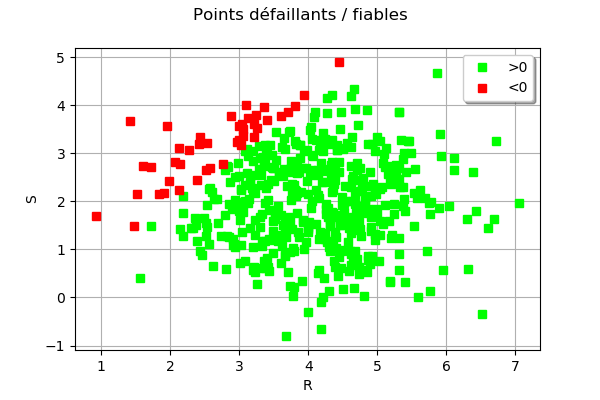

In [21]:
myGraph = ot.Graph('Points défaillants / fiables', 'R', 'S', True, '')
myCloud = ot.Cloud(ot.Sample(XPositif), 'green', 'fsquare', '>0')
myGraph.add(myCloud)
myCloud = ot.Cloud(ot.Sample(XNegatifs), 'red', 'fsquare', '<0')
myGraph.add(myCloud)
myGraph.setLegendPosition("topright")
myGraph

## Dessiner la surface d'état limite

In [22]:
bounds = ot.Interval(lowerBound, upperBound)
bounds

class=Interval name=Unnamed dimension=2 lower bound=class=Point name=Unnamed dimension=2 values=[1.67365,-0.326348] upper bound=class=Point name=Unnamed dimension=2 values=[6.32635,4.32635] finite lower bound=[1,1] finite upper bound=[1,1]

In [23]:
nX = 75
nY = 75
boxExperiment = ot.Box([nX, nY], bounds)
inputSample = boxExperiment.generate()

In [24]:
outputSample = g(inputSample)

In [25]:
def linearSample(xmin, xmax, npoints):
    '''Returns a sample created from a regular grid
    from xmin to xmax with npoints points.'''
    step = (xmax-xmin)/(npoints-1)
    rg = ot.RegularGrid(xmin, step, npoints)
    vertices = rg.getVertices()
    return vertices

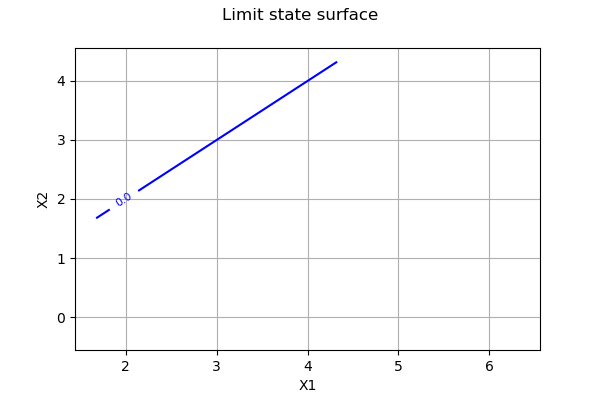

In [26]:
# Create an empty graph
myGraph = ot.Graph('Limit state surface', 'X1', 'X2', True, '')
# Create the contour
levels = ot.Point([0.0])
labels = ["0.0"]
drawLabels = True
x = linearSample(lowerBound[0], upperBound[0], nX + 2)
y = linearSample(lowerBound[1], upperBound[1], nY + 2)
myContour = ot.Contour(x, y, outputSample, levels, labels, drawLabels)
myGraph.add(myContour)
myGraph